In [458]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import os

In [459]:
import tensorflow

In [460]:
import keras

In [461]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from model_architectures import *

In [462]:
import tracks
from tracks import *
reload(tracks)

<module 'tracks' from 'tracks.py'>

In [463]:
import tracks
from tracks import *
reload(tracks)

<module 'tracks' from 'tracks.pyc'>

In [464]:
def adam_small_doublet_model(n_channels,n_labels=2):
    hit_shapes = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, n_channels), name='hit_shape_input')
    infos = Input(shape=(len(tracks.featureLabs),), name='info_input')

    drop = Dropout(0.5)(hit_shapes)
    conv = Conv2D(32, (4, 4), activation='relu', padding='same', data_format="channels_last", name='conv1')(hit_shapes)
    conv = Conv2D(32, (3, 3), activation='relu', padding='same', data_format="channels_last", name='conv2')(conv)
    b_norm = BatchNormalization()(conv)
    pool = MaxPooling2D(pool_size=(2, 2), padding='same', data_format="channels_last", name='pool1')(b_norm)

    conv = Conv2D(64, (3, 3), activation='relu', padding='same', data_format="channels_last", name='conv3')(pool)
    conv = Conv2D(64, (3, 3), activation='relu', padding='same', data_format="channels_last", name='conv4')(conv)
    b_norm = BatchNormalization()(conv)
    pool = MaxPooling2D(pool_size=(2, 2), padding='same', data_format="channels_last", name='pool2')(b_norm)

    conv = Conv2D(64, (3, 3), activation='relu', padding='same', data_format="channels_last", name='conv5')(pool)
    pool = MaxPooling2D(pool_size=(2, 2), padding='same', data_format="channels_last", name='avgpool')(conv)

    flat = Flatten()(pool)
    concat = concatenate([flat, infos])

    b_norm = BatchNormalization()(concat)
    dense = Dense(64, activation='relu', kernel_constraint=max_norm(10.0), name='dense1')(b_norm)
    drop = Dropout(0.5)(dense)
    dense = Dense(32, activation='relu', kernel_constraint=max_norm(10.0), name='dense2')(drop)
    drop = Dropout(0.5)(dense)
    pred = Dense(n_labels, activation='softmax', kernel_constraint=max_norm(10.0), name='output')(drop)

    model = Model(inputs=[hit_shapes, infos], outputs=pred)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [465]:
from matplotlib import pyplot as plt

In [466]:
padshape = 16

In [467]:
path = "./samples/"
d = "2_30_Apr18_cnn_tracks_1_aa.txt"
dfTracks = 0
dfDoublets = 0
#with open(path + d, 'rb') as df:
#    dfTracks = pd.read_table(df, sep="\t", header = None)

In [468]:
path = "./samples/"
d = "2_30_Apr18_cnn_tracks_1_aa.txt"
FILES = ["./samples/2_30_Apr18_cnn_tracks_1_aa.txt"]
FILES = ["./samples/" + el for el in os.listdir("./samples/")][:5]
VAL_FILES = ["./samples/2_30_Apr18_cnn_tracks_1_ab.txt"]
train_tracks = Tracks(FILES,noduplicates=True,numHits=10)
val_tracks = Tracks(VAL_FILES,noduplicates=True,numHits=10)

Loading file 2/5 : ./samples/2_30_Apr18_cnn_tracks_1_aa.txt
Loading file 3/5 : ./samples/2_30_Apr18_cnn_tracks_1_ab.txt
Loading file 4/5 : ./samples/2_30_Apr18_cnn_tracks_1_ac.txt
Loading file 5/5 : ./samples/2_30_Apr18_cnn_tracks_1_ad.txt
Loading file 1/1 : ./samples/2_30_Apr18_cnn_tracks_1_ab.txt


hit_0_Layer


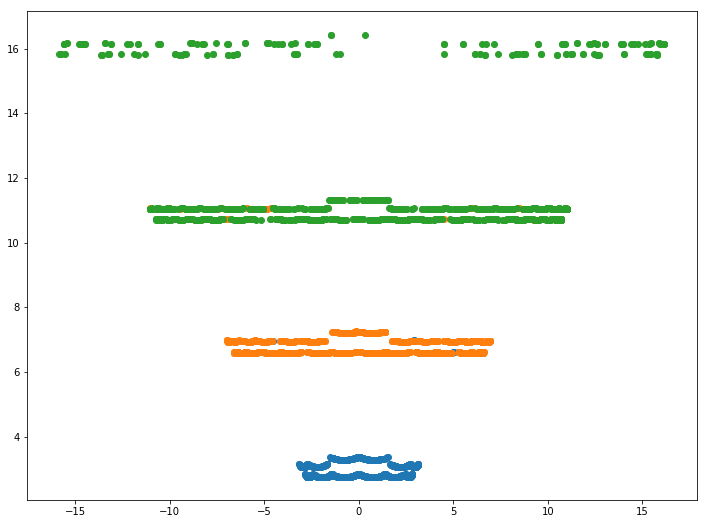

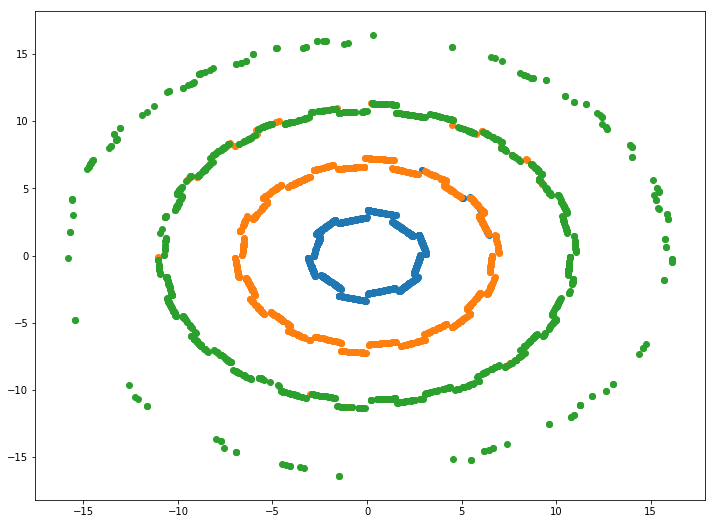

In [469]:
plt.figure(figsize=(12,9))
nhit=0
print(hitDets[nhit][1])
barrel_3 = train_tracks.data[(train_tracks.data[hitDets[nhit][0]]==1.0) & (train_tracks.data[hitDets[nhit+1][0]]==1.0) & (train_tracks.data[hitDets[nhit+2][0]]==1.0)]
barrel_3 = train_tracks.data[(train_tracks.data[hitDets[nhit][0]]==1.0) & (train_tracks.data[hitDets[nhit+1][0]]==1.0) & (train_tracks.data[hitDets[nhit+2][0]]==1.0)]
#print(barrel4_3[])
plt.scatter(barrel_3[hitCoords[nhit][0]].values,barrel_3[hitCoords[nhit][4]].values)
plt.scatter(barrel_3[hitCoords[nhit+1][0]].values,barrel_3[hitCoords[nhit+1][4]].values)
plt.scatter(barrel_3[hitCoords[nhit+2][0]].values,barrel_3[hitCoords[nhit+2][4]].values)
plt.figure(figsize=(12,9))
plt.scatter(barrel_3[hitCoords[nhit][0]].values,barrel_3[hitCoords[nhit][1]].values)
plt.scatter(barrel_3[hitCoords[nhit+1][0]].values,barrel_3[hitCoords[nhit+1][1]].values)
plt.scatter(barrel_3[hitCoords[nhit+2][0]].values,barrel_3[hitCoords[nhit+2][1]].values)

hit_2_Side


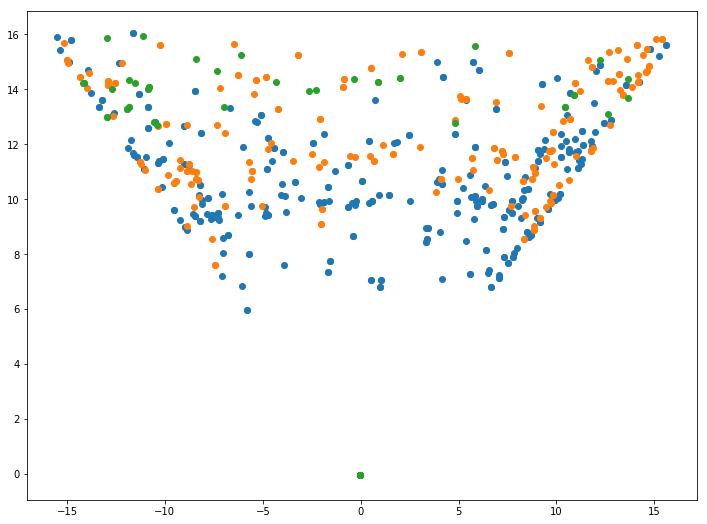

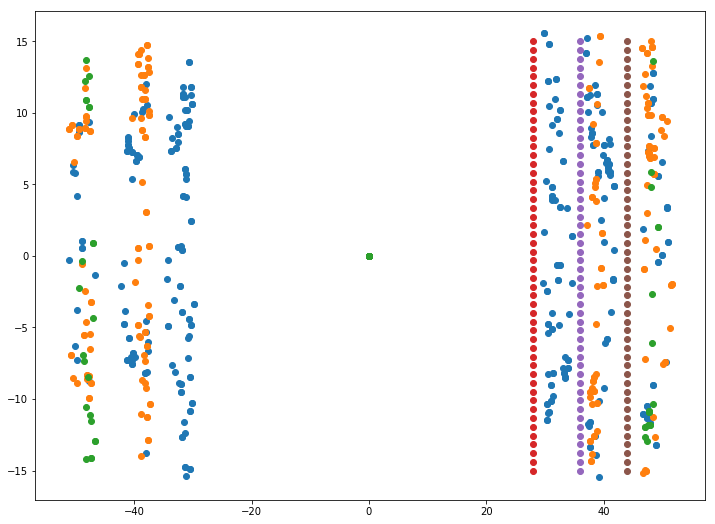

In [470]:
plt.figure(figsize=(12,9))
nhit=2
print(hitDets[nhit][3])
endcap_3 = train_tracks.data[(train_tracks.data[hitDets[nhit][0]]==0.0)]# & (train_tracks.data[hitDets[nhit+1][0]]==0.0) & (train_tracks.data[hitDets[nhit+2][0]]==0.0)]
#endcap_3 = endcap_3[(endcap_3[hitDets[nhit][3]]==2.0)]# & (train_tracks.data[hitDets[nhit+1][0]]==0.0) & (train_tracks.data[hitDets[nhit+2][0]]==0.0)]
#endcap_3 = endcap_3[(endcap_3[hitDets[nhit][4]]<5.0)]
#print(barrel4_3[])
plt.scatter(endcap_3[hitCoords[nhit][0]].values,endcap_3[hitCoords[nhit][4]].values)
plt.scatter(endcap_3[hitCoords[nhit+1][0]].values,endcap_3[hitCoords[nhit+1][4]].values)
plt.scatter(endcap_3[hitCoords[nhit+2][0]].values,endcap_3[hitCoords[nhit+2][4]].values)
plt.figure(figsize=(12,9))
plt.scatter(endcap_3[hitCoords[nhit][2]].values,endcap_3[hitCoords[nhit][0]].values)
plt.scatter(endcap_3[hitCoords[nhit+1][2]].values,endcap_3[hitCoords[nhit+1][0]].values)
plt.scatter(endcap_3[hitCoords[nhit+2][2]].values,endcap_3[hitCoords[nhit+2][0]].values)
plt.scatter(np.linspace(--28,--28,50),np.linspace(-15,15,50))
plt.scatter(np.linspace(--36,--36,50),np.linspace(-15,15,50))
plt.scatter(np.linspace(--44,--44,50),np.linspace(-15,15,50))

(1933, 10, 16, 16)
(1933, 16, 16, 10)


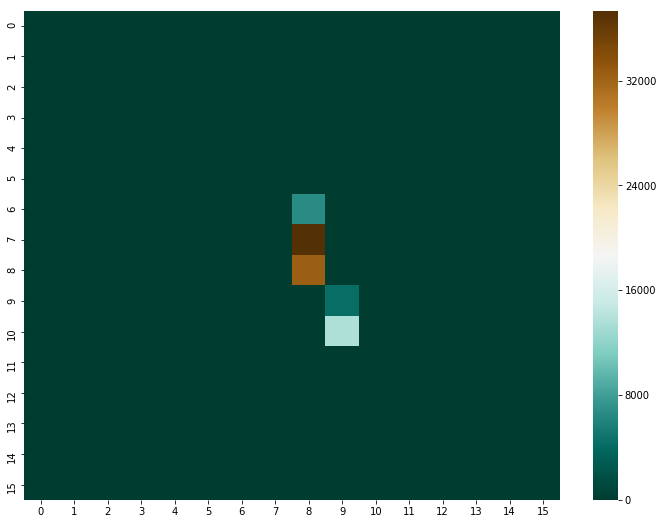

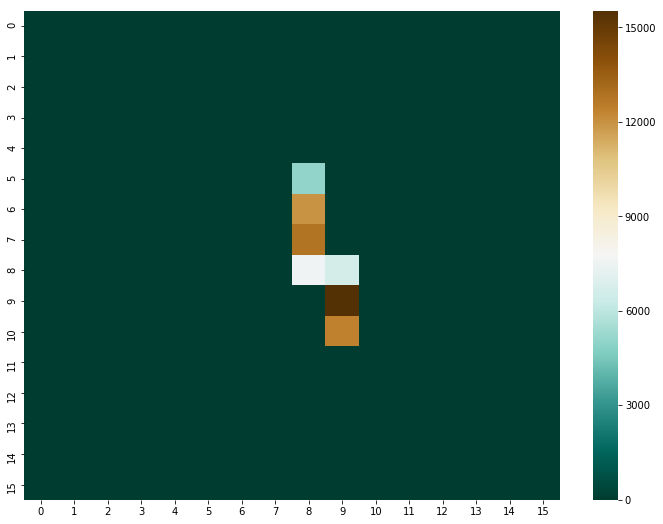

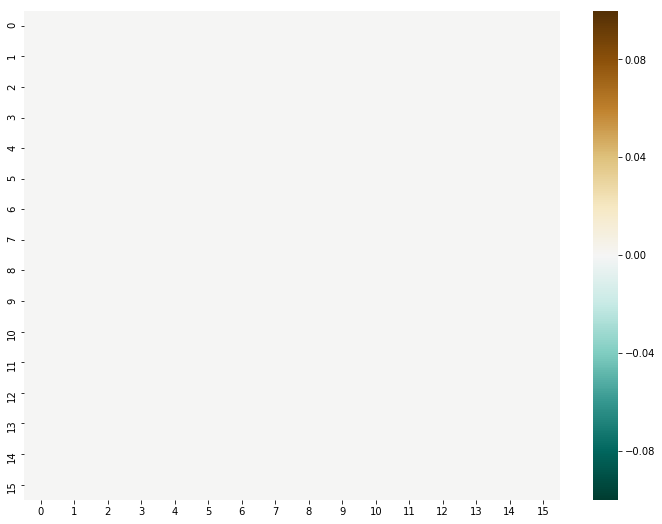

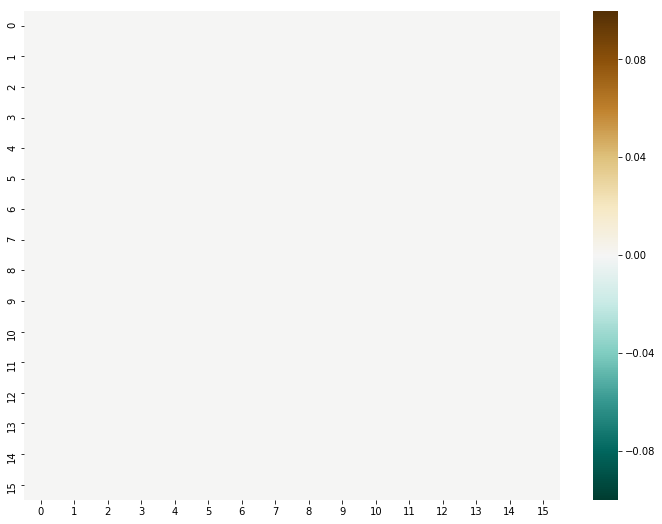

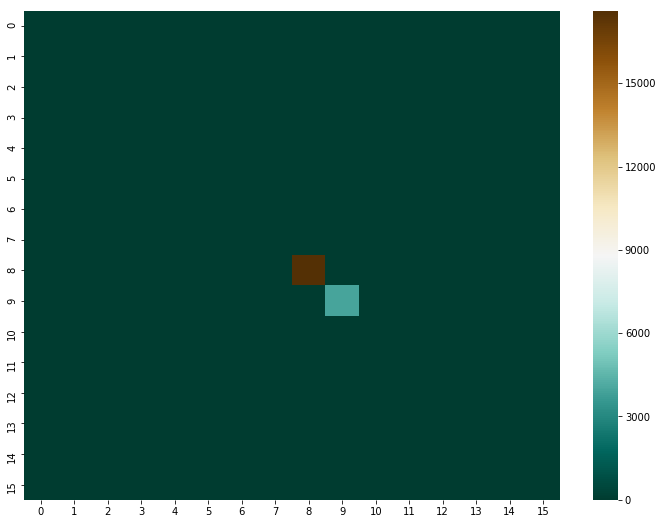

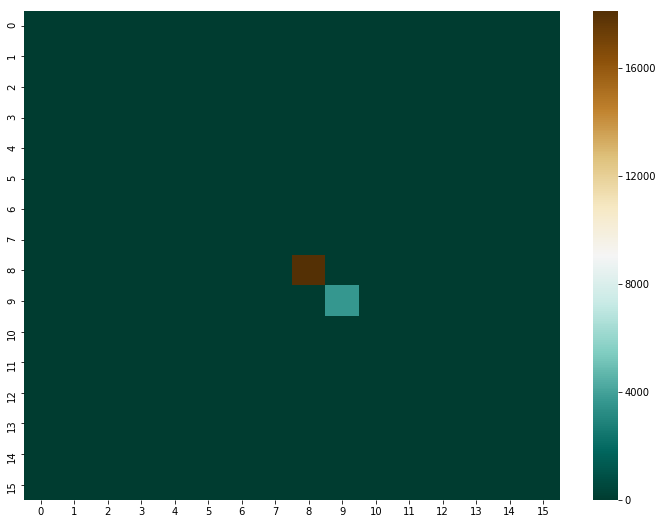

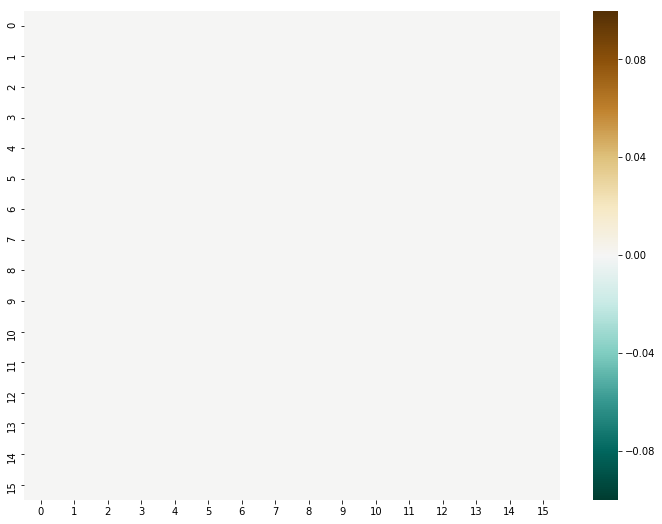

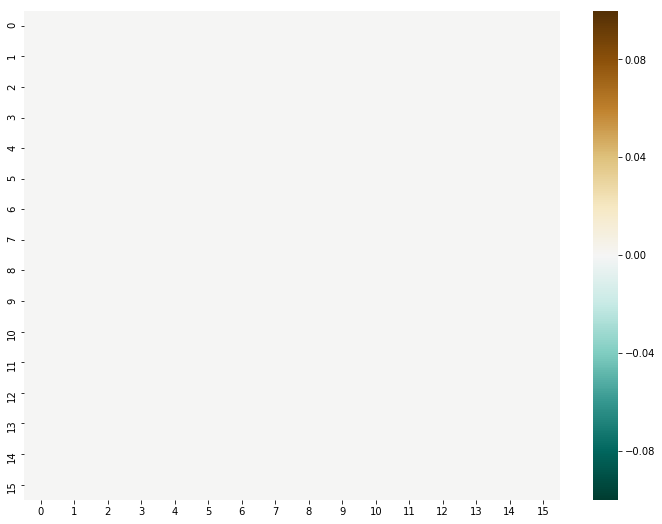

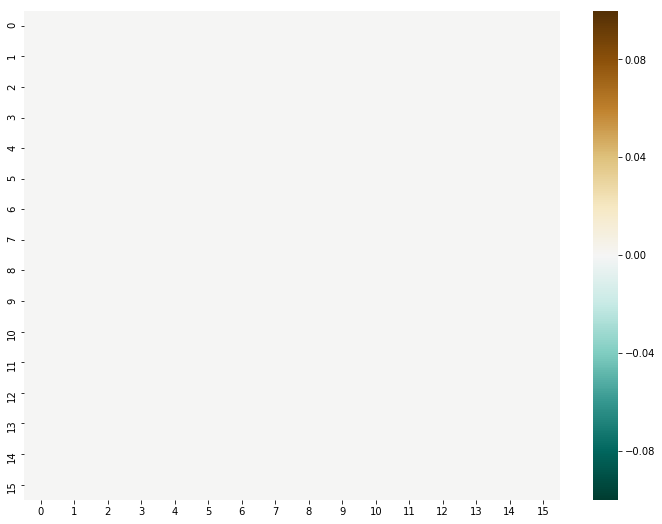

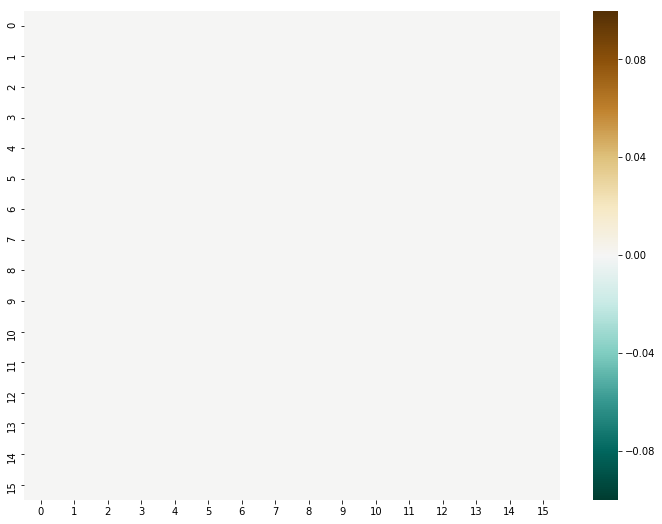

In [471]:
l = []
h = train_tracks.data[allPixels].as_matrix().astype(np.float16)
h_res = h.reshape(-1,10,16,16)
for hits,layers in zip(h_res,train_tracks.data[hitLayers].values):
    layer_hits = np.zeros(hits.shape)
    #print(hits.shape)
    layer_hits = np.zeros(hits.shape)
    ok = False
    #if(layers[4]>4):
        #print(layers)
    for id_layer in layer_ids:
        
        bool_mask = layers == id_layer
        
        #if(layers[4]>4) and (id_layer ==4):
        #    print(bool_mask)
        #if bool_mask[4]:
        #    ok=True
        if(any(bool_mask)):
            layer_hits[id_layer, :] = hits[bool_mask,:,:]
        #if(layers[4]>4) and (id_layer ==4):
        #    print()
        #print(bool_mask)
        #print(layer_hits[bool_mask, :])
        #print(layer_hits.shape)
        #ll.append(layer_hits)
    l.append(layer_hits)
    #if ok:
        #print(layer_hits[4])

data = np.array(l)  # (channels, batch_size, hit_size)
data = data.reshape((len(data),-1,padshape, padshape))
X_track = np.transpose(data, (0, 2, 3, 1))
print(data.shape)
print(X_track.shape)
for i in range(10):
    plt.figure(figsize=(12,9))
    sns.heatmap(data[153,i,:,:],cmap="BrBG_r")

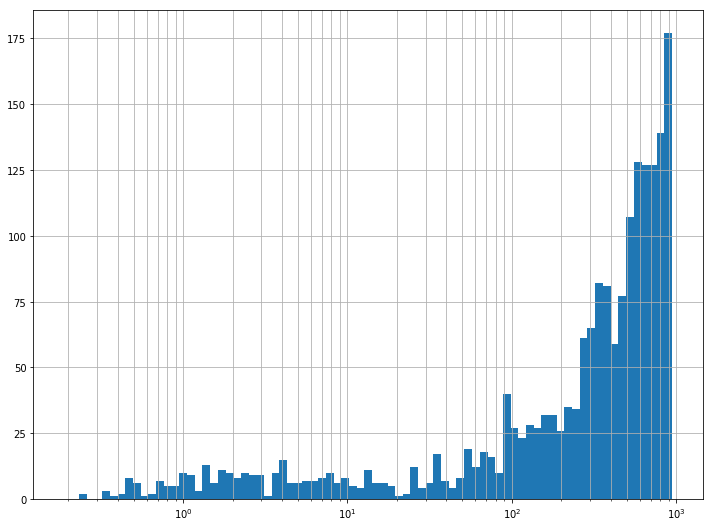

[  0   0   2   0   0   3   1   2   8   6   1   2   7   5   5  10   9   3
  13   6  11  10   8  10   9   9   1  10  15   6   6   7   7   8  10   6
   8   5   4  11   6   6   5   1   2  12   4   6  17   7   4   8  19  12
  18  16  10  40  27  23  28  27  32  32  26  35  34  61  65  82  81  59
  77 107 128 127 127 139 177]
[  1.99526231e-01   2.22246762e-01   2.47554535e-01   2.75744164e-01
   3.07143813e-01   3.42119017e-01   3.81076930e-01   4.24471075e-01
   4.72806615e-01   5.26646239e-01   5.86616711e-01   6.53416164e-01
   7.27822230e-01   8.10701095e-01   9.03017574e-01   1.00584635e+00
   1.12038449e+00   1.24796536e+00   1.39007417e+00   1.54836526e+00
   1.72468132e+00   1.92107493e+00   2.13983234e+00   2.38350018e+00
   2.65491507e+00   2.95723662e+00   3.29398426e+00   3.66907815e+00
   4.08688488e+00   4.55226828e+00   5.07064599e+00   5.64805262e+00
   6.29120993e+00   7.00760510e+00   7.80557792e+00   8.69441781e+00
   9.68447203e+00   1.07872661e+01   1.20156380e+01   1.3

In [472]:
plt.figure(figsize=(12,9))
bins = np.logspace(-0.7, 3, 80)
widths = (bins[1:] - bins[:-1])
hist = np.histogram(train_tracks.data["Pt"], bins=bins,normed=False)
hist_norm = hist[0]#/widths
plt.bar(bins[:-1], hist_norm, widths)

plt.xscale('log')
#plt.yscale('log')

#plt.ylim(1e-2,5e3)
plt.grid()
plt.grid(which='minor')
plt.show()
print(hist_norm)
print(bins)

In [473]:
train_tracks.clean_dataset()
#train_tracks.data_by_pt()
train_tracks.data_by_pdg()

val_tracks.clean_dataset()
val_tracks.data_by_pdg()

Number of 211.0 : 1077
Number of 321.0 : 828
 - New no. of 211.0 : 828
 - New no. of 321.0 : 828
Number of 211.0 : 309
Number of 321.0 : 199
 - New no. of 211.0 : 199
 - New no. of 321.0 : 199


In [474]:
train_tracks.data.head()

,BunchCrossing,Charge,DXY,DZ,ET,Eta,IsChargeMatched,IsSigSimMatched,MSqr,MT,...,hit_9_R,hit_9_Side,hit_9_Skew,hit_9_SumADC,hit_9_X,hit_9_Y,hit_9_Z,lumi,nHits,run
876,0,1,-0.015250,5.167570,262.793,0.922492,1,1,0.243717,262.7930,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1,4.0,1
859,0,-1,0.070279,0.282065,922.362,1.240650,1,1,0.019480,922.3620,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1,4.0,1
389,0,-1,-0.070316,5.245660,343.613,0.099028,1,1,0.019480,343.6130,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1,4.0,1
717,0,-1,-0.040910,0.490774,83.196,0.596298,1,1,0.243717,83.1964,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1,4.0,1
288,0,-1,-0.055227,0.333953,406.862,-1.342760,1,1,0.243717,406.8630,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1,3.0,1


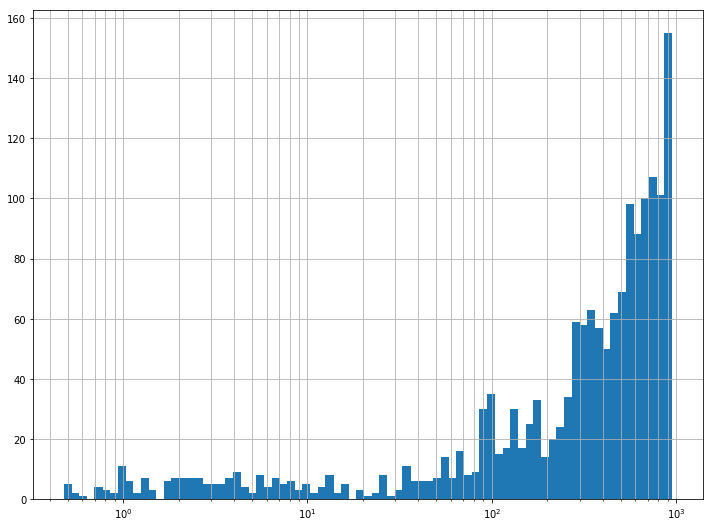

[  5   2   1   0   4   3   2  11   6   2   7   3   0   6   7   7   7   7
   5   5   5   7   9   4   2   8   4   7   5   6   3   5   2   4   8   2
   5   0   3   1   2   8   1   3  11   6   6   6   7  14   7  16   8   9
  30  35  15  17  30  17  25  33  14  20  24  34  59  58  63  57  50  62
  69  98  88 100 107 101 155]
[  5.01187234e-01   5.51787874e-01   6.07497232e-01   6.68831095e-01
   7.36357319e-01   8.10701095e-01   8.92550734e-01   9.82664039e-01
   1.08187532e+00   1.19110313e+00   1.31135875e+00   1.44375556e+00
   1.58951936e+00   1.74999970e+00   1.92668238e+00   2.12120322e+00
   2.33536319e+00   2.57114508e+00   2.83073187e+00   3.11652694e+00
   3.43117634e+00   3.77759322e+00   4.15898488e+00   4.57888244e+00
   5.04117351e+00   5.55013820e+00   6.11048876e+00   6.72741317e+00
   7.40662323e+00   8.15440740e+00   8.97768900e+00   9.88409040e+00
   1.08820035e+01   1.19806674e+01   1.31902542e+01   1.45219627e+01
   1.59881225e+01   1.76023082e+01   1.93794645e+01   2.1

In [475]:
plt.figure(figsize=(12,9))
bins = np.logspace(-0.3, 3, 80)
widths = (bins[1:] - bins[:-1])
hist = np.histogram(train_tracks.data["Pt"], bins=bins,normed=False)
hist_norm = hist[0]
plt.bar(bins[:-1], hist_norm, widths)

plt.xscale('log')
#plt.yscale('log')

#plt.ylim(1e-2,5e3)
plt.grid()
plt.grid(which='minor')
plt.show()
print(hist_norm)
print(bins)
print(np.sum(hist[0]))

In [476]:
X_track, X_info, y = train_tracks.get_track_hits_layer_data()
X_val_track, X_val_info, y_val = val_tracks.get_track_hits_layer_data()

set([0.0, 1.0])
set([0.0, 1.0])


In [477]:
print(y)

[[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]


In [478]:
part={}

In [479]:
part[tuple(y[0])] = "Pion"
part[tuple(y[1])] = "Kaon"

In [480]:
train_input_list = [X_track, X_info]
val_input_list = [X_val_track, X_val_info]

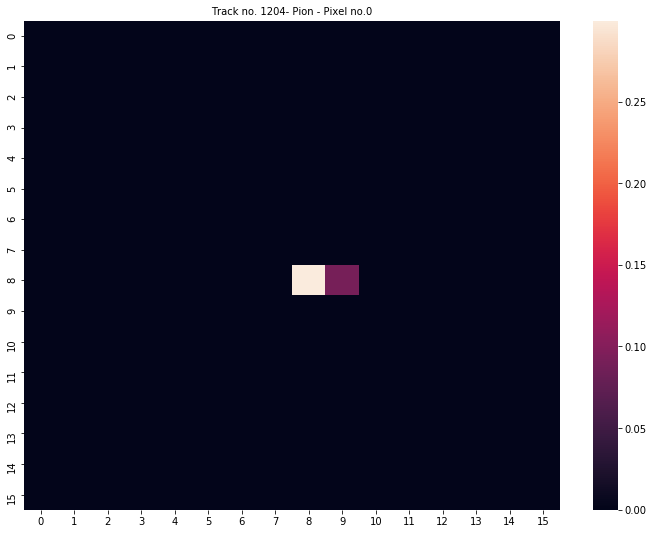

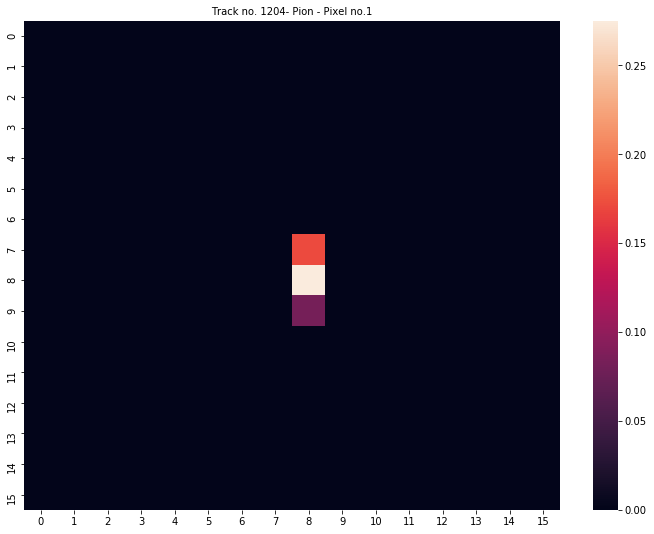

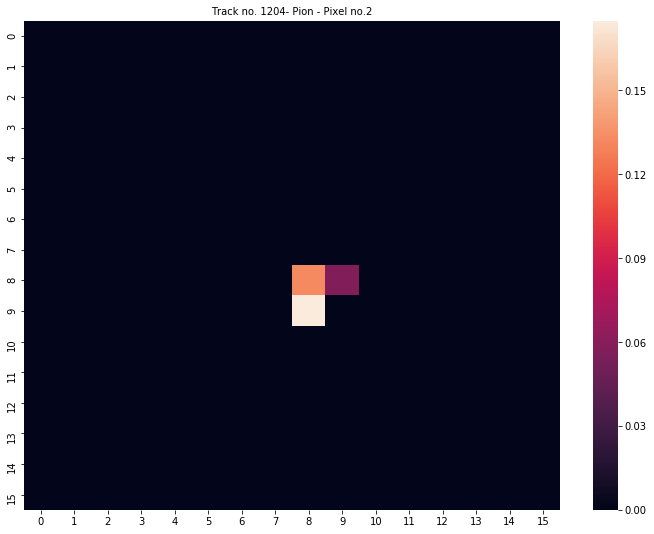

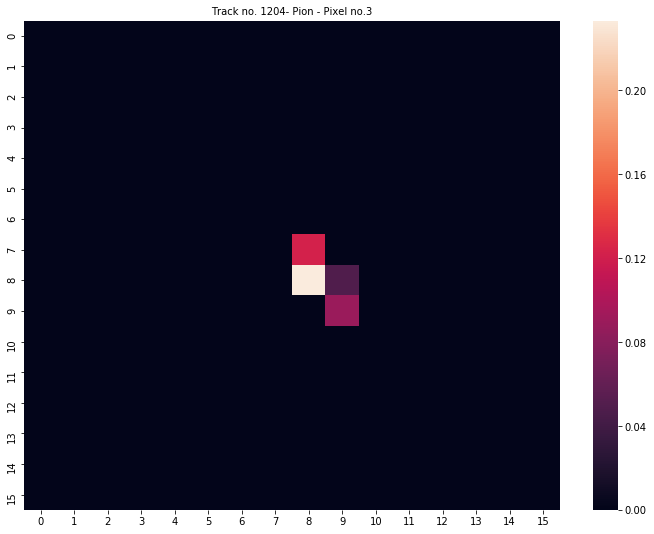

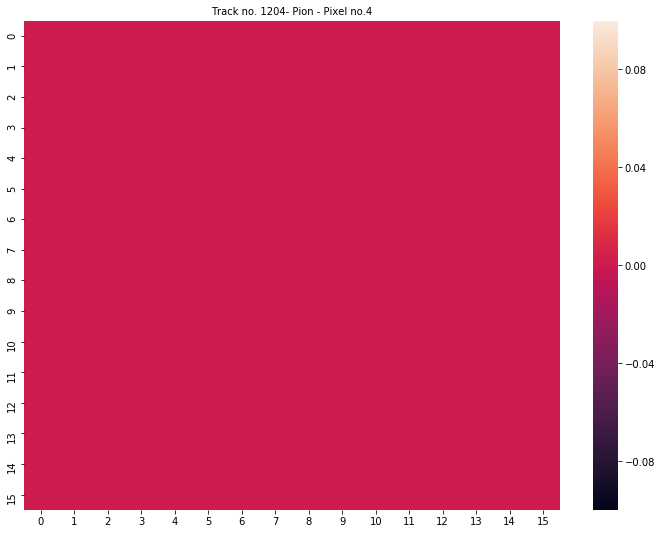

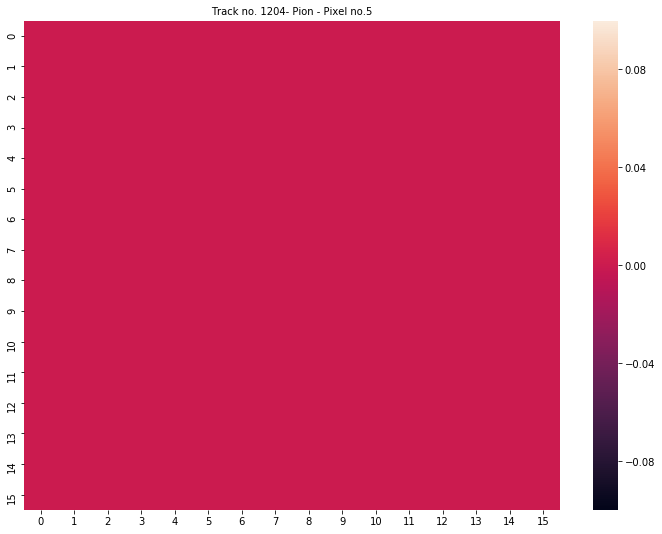

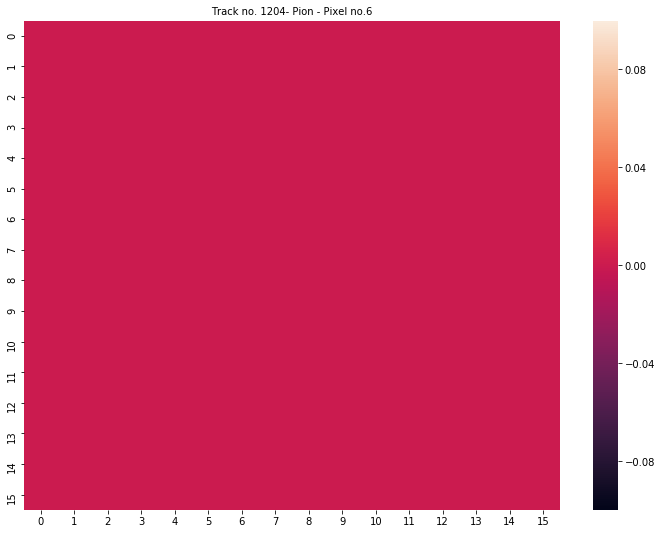

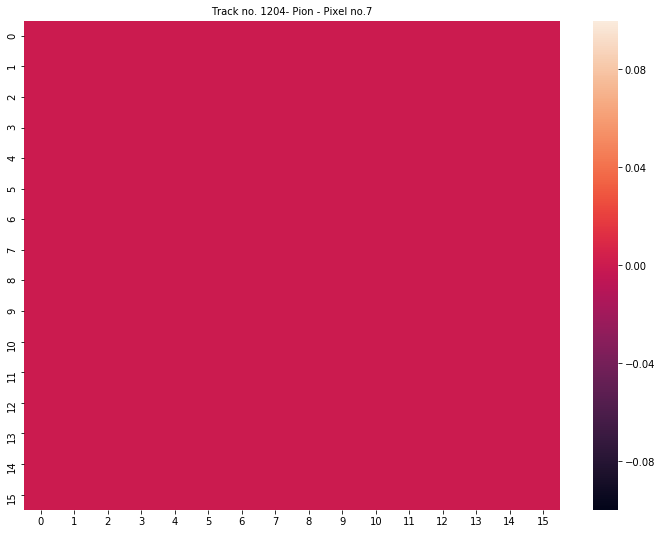

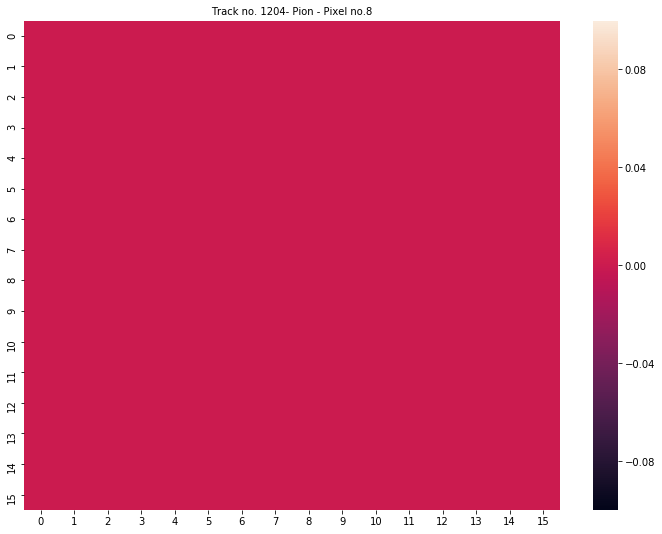

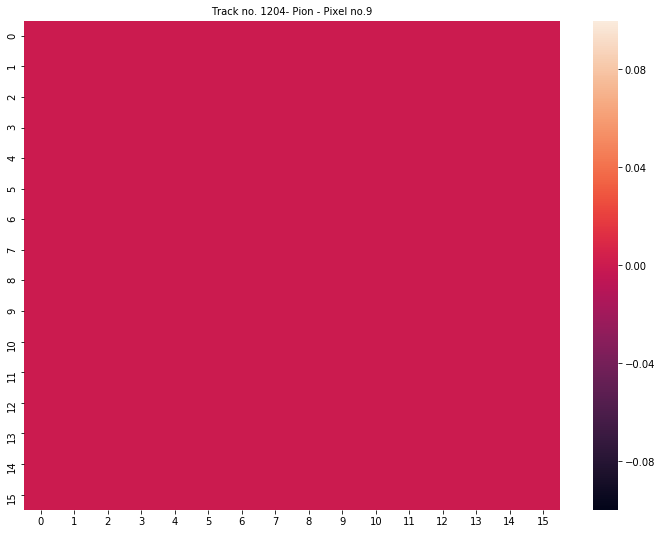

In [481]:
u = int(random.uniform(0,X_track.shape[0]))
for i in range(10):
    plt.figure(figsize=(12,9))
    plt.title("Track no. " + str(u) + "- " + str(part[tuple(y[u])]) + " - Pixel no." + str(i),fontsize=10)
        #print(dfTracks[dfTracks["hit_6_IsBarrel"]>0.0][hitDets[i]].values[u])
    sns.heatmap(X_track[u,:,:,i])
    #plt.imshow(X_track[5,:,:,i])
    #plt.colorbar()
    #plt.title("Track no. " + str(u) + "- " + str(y[u]) + " - Pixel no." + str(i),fontsize=25)
    plt.show()


In [482]:
model = adam_small_doublet_model(train_input_list[0].shape[-1],n_labels=2)

In [483]:
callbacks = [
        EarlyStopping(monitor='val_loss', patience=10),
        ModelCheckpoint("test_last.h5", save_best_only=True,
                        save_weights_only=True),
        TensorBoard(log_dir="", histogram_freq=0,
                    write_graph=True, write_images=True)
		#roc_callback(training_data=(train_input_list,y),validation_data=(val_input_list,y_val))
    ]

In [484]:
history = model.fit(train_input_list, y, batch_size=1024, epochs=100, shuffle=True,validation_data=(val_input_list,y_val), callbacks=callbacks, verbose=True)

Train on 1656 samples, validate on 398 samples
Epoch 1/100
1656/1656 [==============================] - 2s - loss: 1.0569 - acc: 0.5115 - val_loss: 1.8780 - val_acc: 0.5000
Epoch 2/100
1656/1656 [==============================] - 2s - loss: 0.9204 - acc: 0.5477 - val_loss: 1.2711 - val_acc: 0.5050
Epoch 3/100
1656/1656 [==============================] - 2s - loss: 0.8398 - acc: 0.5568 - val_loss: 1.0060 - val_acc: 0.5151
Epoch 4/100
1656/1656 [==============================] - 2s - loss: 0.8036 - acc: 0.5604 - val_loss: 0.8698 - val_acc: 0.5226
Epoch 5/100
1656/1656 [==============================] - 2s - loss: 0.7626 - acc: 0.5851 - val_loss: 0.7889 - val_acc: 0.5251
Epoch 6/100
1656/1656 [==============================] - 2s - loss: 0.7532 - acc: 0.5719 - val_loss: 0.7431 - val_acc: 0.5477
Epoch 7/100
1024/1656 [=================>............] - ETA: 0s - loss: 0.7008 - acc: 0.6143

KeyboardInterrupt: 

In [ ]:
print(len(dataLab))
#print(dataLab)
print(len(hitLabs)-256)

In [ ]:
dfTracks.columns = dataLab

In [ ]:
dfTracks[hitCoords[0]].head()

In [ ]:
dfTracks.head()

In [ ]:
dfTracks[hitPixels[0]].head()

In [174]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["Pt"].values,log=True,range=[0.0,100], bins=200,normed=True)
#plt.ylim(10,1e2)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

TypeError: 'int' object has no attribute '__getitem__'

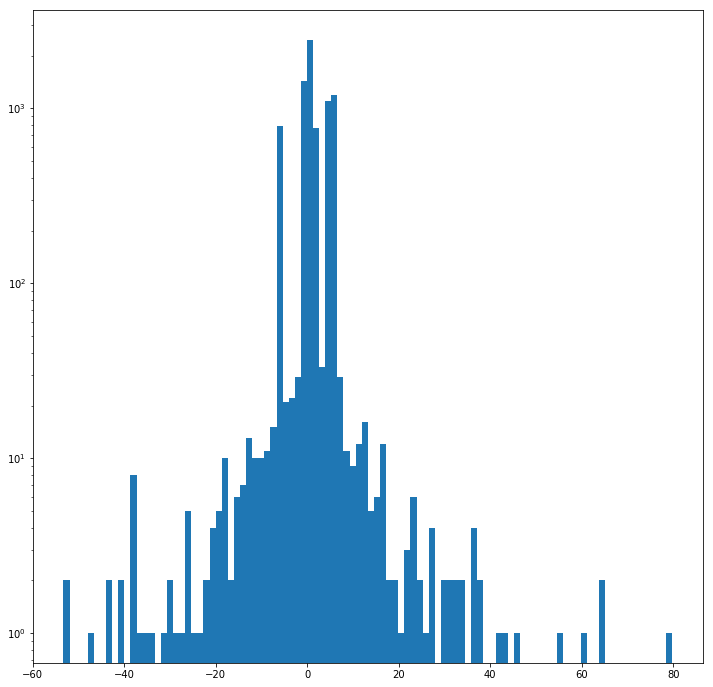

8100


In [87]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==211.0) & (dfTracks["SharedFraction"] == 1.0)]["DZ"].values,log=True,bins=100)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==211.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

In [112]:
ptrRanges = []
for i in range(25):
    ptrRanges.append([i*40.0,(i+1)*40])
print(ptrRanges)

[[0.0, 40], [40.0, 80], [80.0, 120], [120.0, 160], [160.0, 200], [200.0, 240], [240.0, 280], [280.0, 320], [320.0, 360], [360.0, 400], [400.0, 440], [440.0, 480], [480.0, 520], [520.0, 560], [560.0, 600], [600.0, 640], [640.0, 680], [680.0, 720], [720.0, 760], [760.0, 800], [800.0, 840], [840.0, 880], [880.0, 920], [920.0, 960], [960.0, 1000]]


In [ ]:
numMin = 9999999
for r in ptrRanges:
    
    numMin = min(numMin,(dfTracks[dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["Pt"])

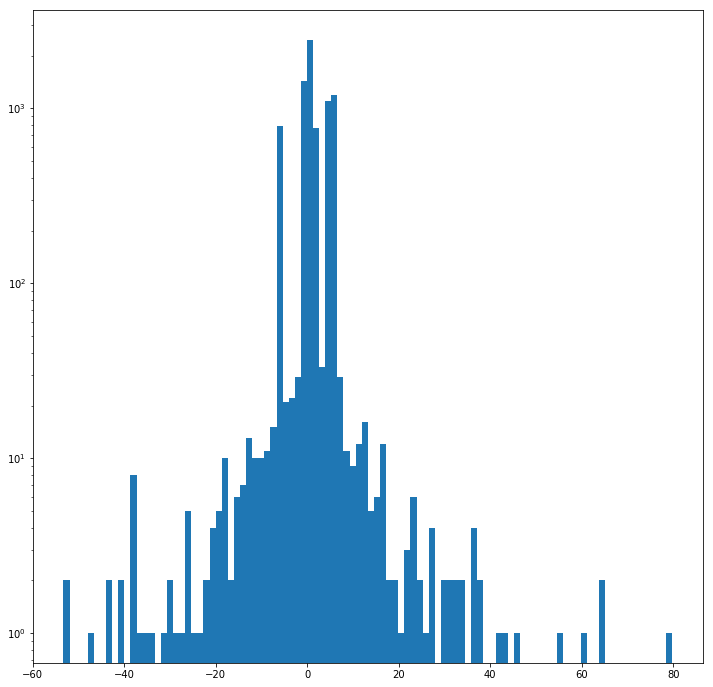

8100


In [88]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["DZ"].values,log=True,bins=100)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

In [75]:
dfTracks["PdgId"].value_counts()

-211     7607
 211     7551
 321     4129
-321     3971
 2212     600
-11       537
 11       496
-2212      82
-13        12
 13         6
 3222       3
 3112       2
-3312       2
-3222       1
-3112       1
Name: PdgId, dtype: int64

0
[   1.    0.  160.   -1.   -1.   -1.    5.]


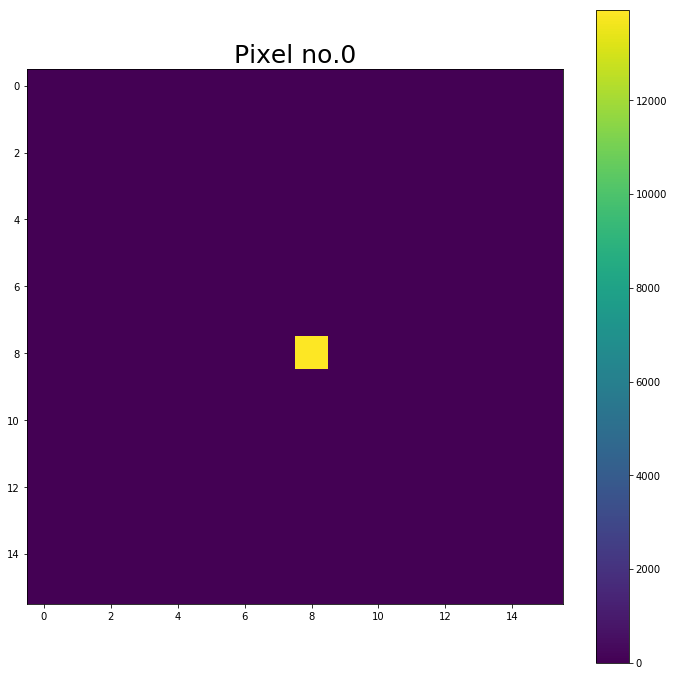

[   1.    0.  144.   -1.   -1.   -1.    5.]


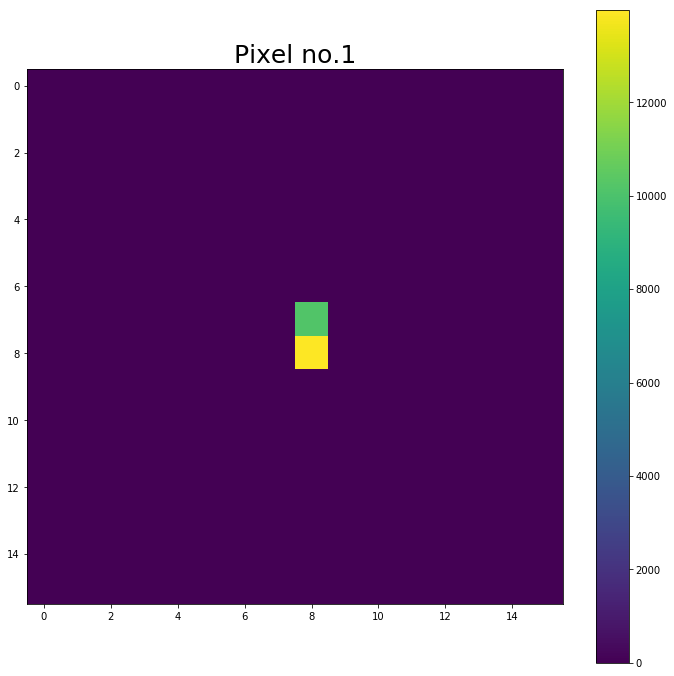

[  1.   1.  80.  -1.  -1.  -1.   5.]


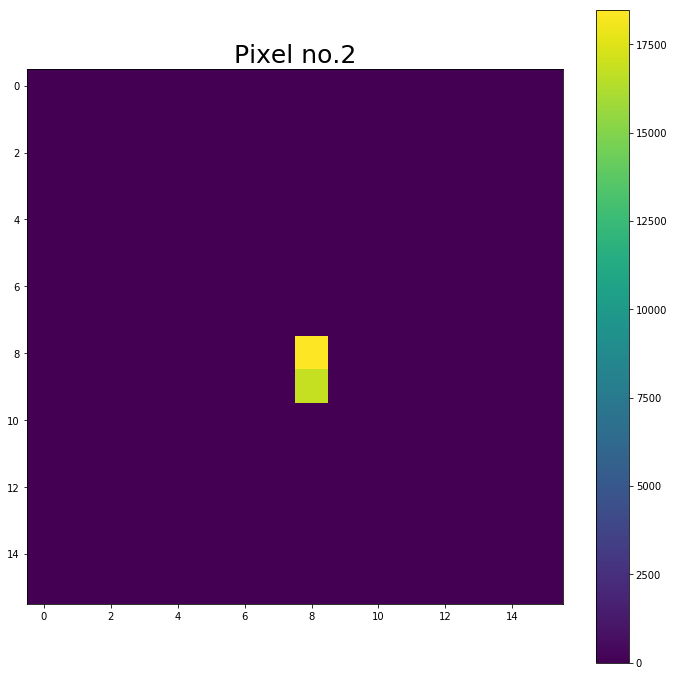

[  1.   2.  32.  -1.  -1.  -1.   4.]


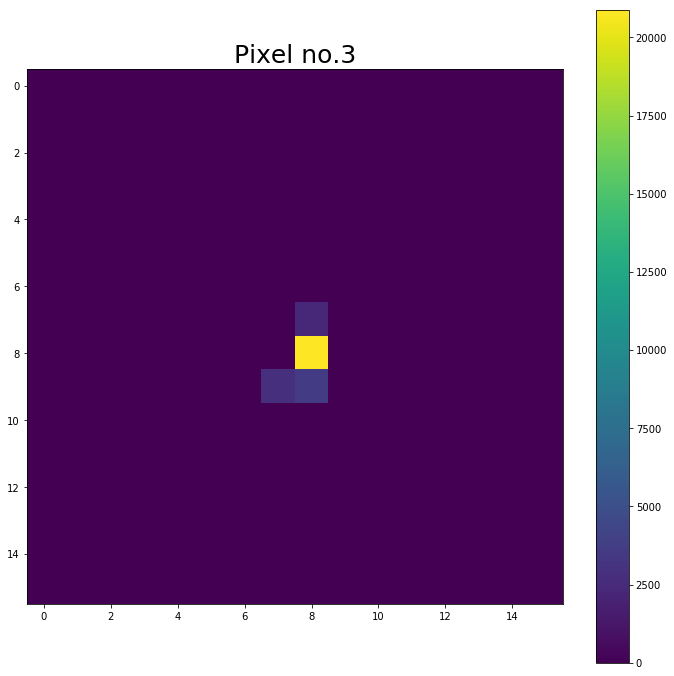

[  1.   2.  16.  -1.  -1.  -1.   4.]


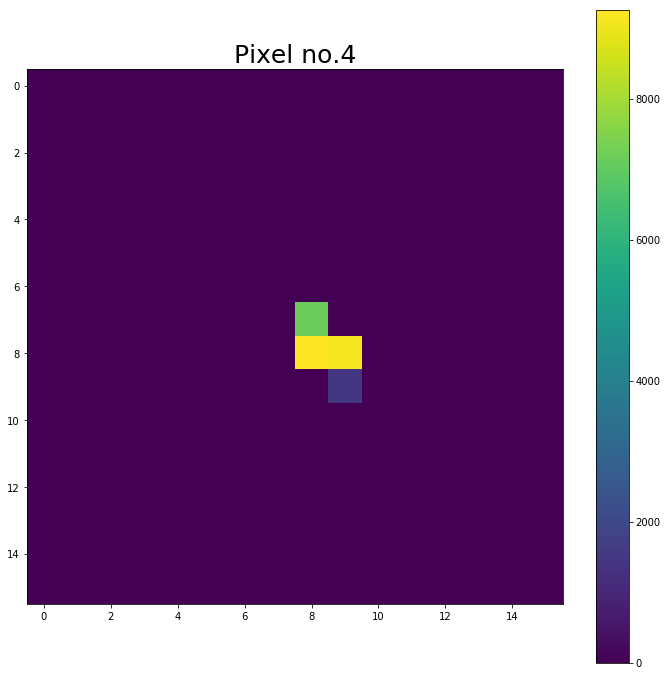

[  1.   3.  16.  -1.  -1.  -1.   4.]


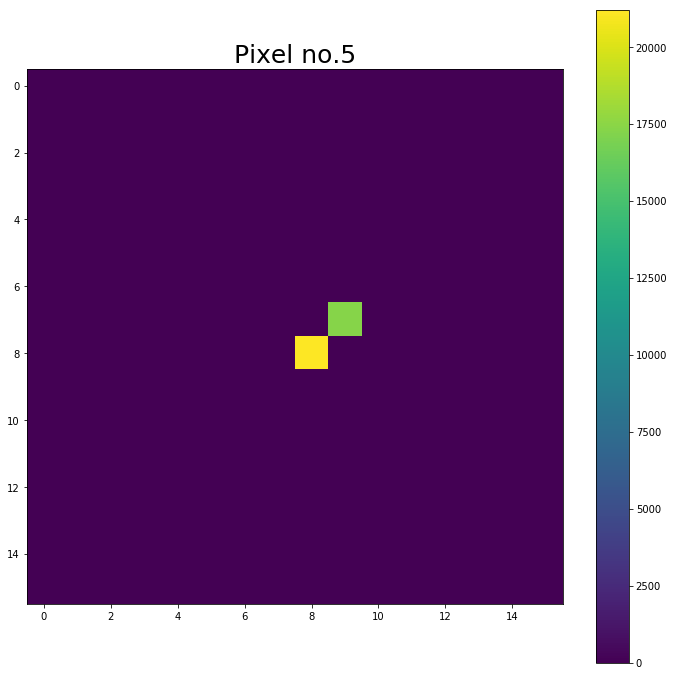

[ 1.  3.  0. -1. -1. -1.  4.]


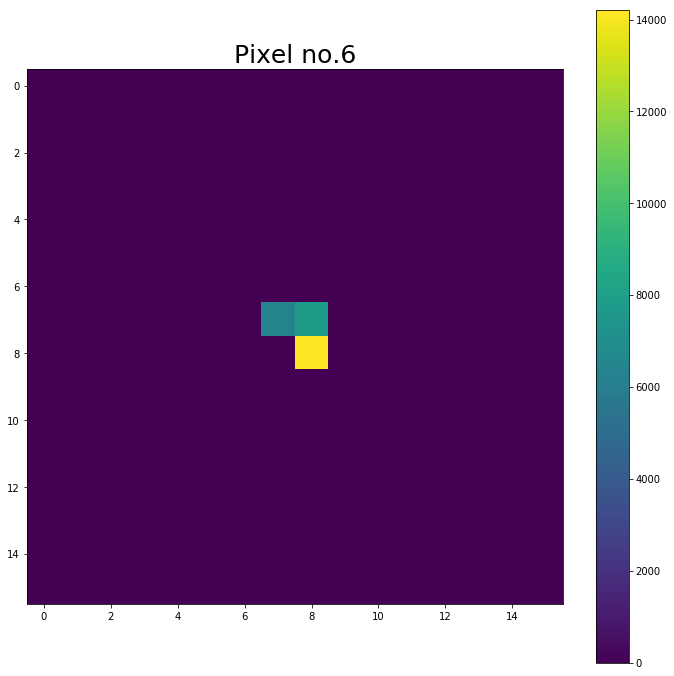

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


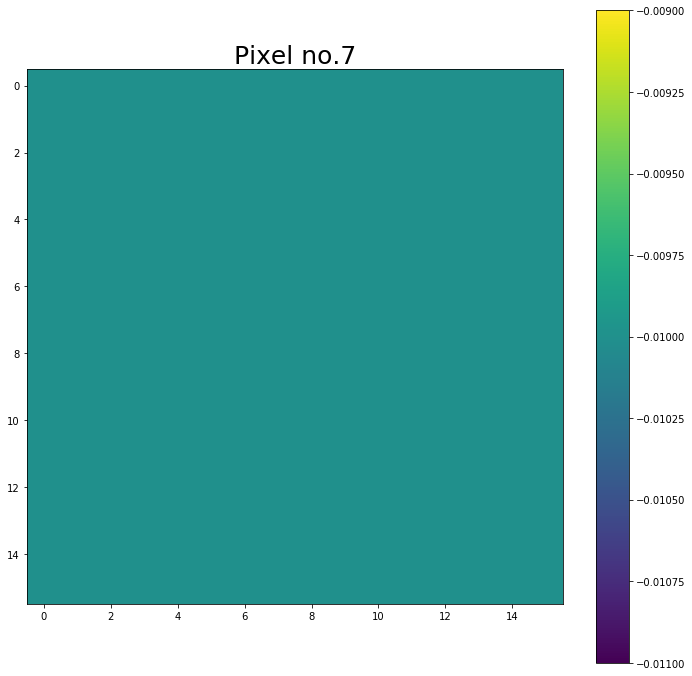

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


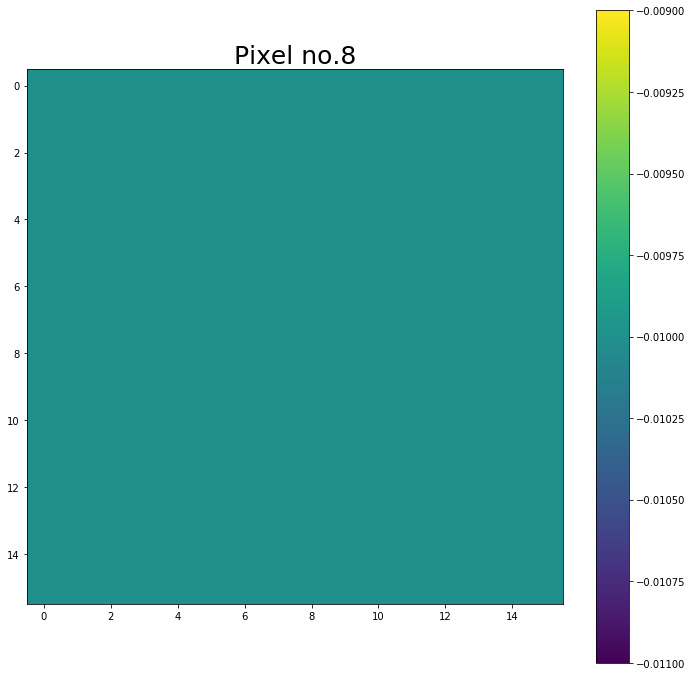

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


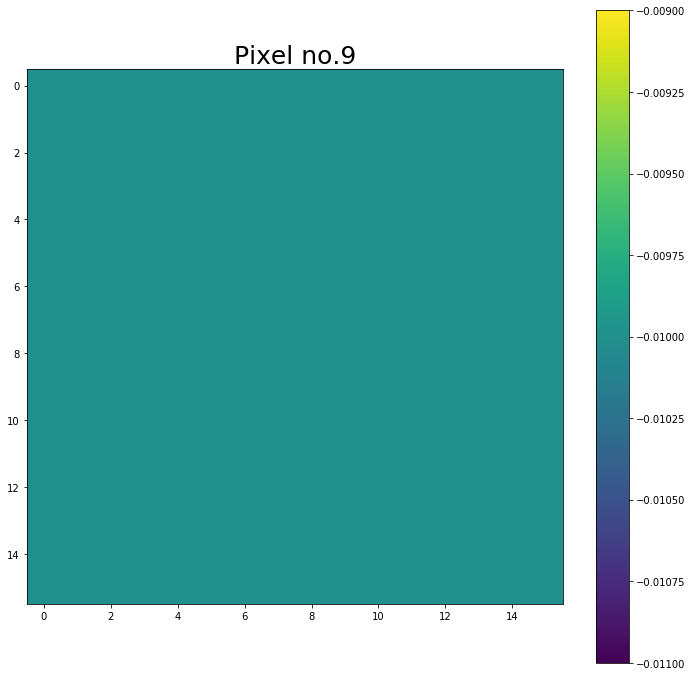

In [117]:
u = int(random.uniform(0,dfTracks[dfTracks["hit_6_IsBarrel"]>0.0].shape[0]))
print u

for i in range(10):
    plt.figure(figsize=(12,12))
    print(dfTracks[dfTracks["hit_6_IsBarrel"]>0.0][hitDets[i]].values[u])
    plt.imshow(dfTracks[dfTracks["hit_6_IsBarrel"]>0.0][hitPixels[i]].values[u].reshape(padshape,padshape))
    plt.colorbar()
    plt.title("Pixel no." + str(i),fontsize=25)
    plt.show()